# Machine Learning 1, Übung 3
(c) 2023 by Harald Bögeholz

In [21]:
import numpy as np

np.random.seed(42)
m = 25
x = np.random.rand(m) * 10 - 5
y = 0.5*x*x + x + 3 + np.random.randn(m)

In [22]:
import math
import matplotlib.pyplot as plt

x_range = max(x) - min(x)
x_min = min(x) - 0.1 * x_range
x_max = max(x) + 0.1 * x_range
linX = np.linspace(x_min, x_max, num=400)
y_range = max(y) - min(y)
y_min = min(y) - 0.1 * y_range
y_max = max(y) + 0.1 * y_range

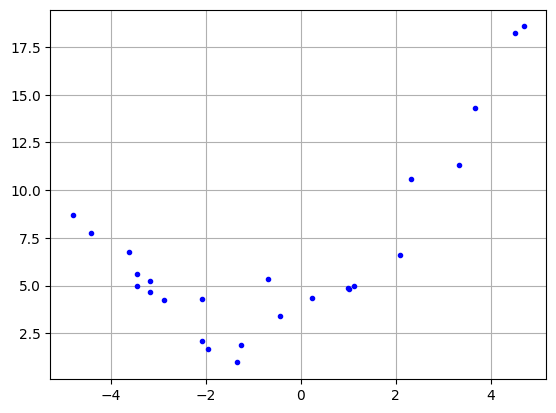

In [23]:
plt.plot(x,y,"b.")
plt.grid()
plt.show()

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
model = LinearRegression()

Für das Modell `LinearRegression` müssen wir unseren Datenvektor `x` in eine Matrix mit einer einzigen Spalte überführen:

In [26]:
X = x.reshape(-1,1)

Aufteilen in Trainings- und Testdaten:

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

In [28]:
X.shape

(25, 1)

In [29]:
X_train.shape

(20, 1)

In [30]:
X_test.shape

(5, 1)

`PolynomialFeatures` erweitert eine Feature-Matrix um zusätzliche Spalten mit polynomialen Features, in unserem Fall mit Potenzen unseres Vektors.

In [31]:
from sklearn.preprocessing import PolynomialFeatures

In [32]:
poly = PolynomialFeatures(degree=20, include_bias=False)

In [33]:
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

In [34]:
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)

LinearRegression()

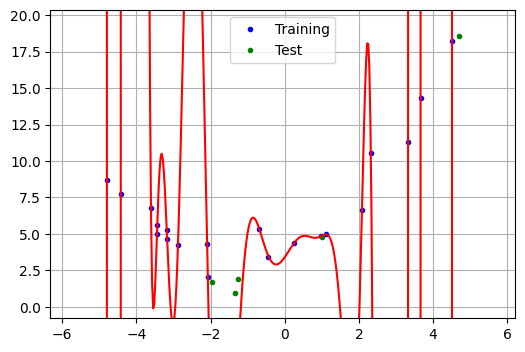

In [35]:
linX_poly = poly.fit_transform(linX.reshape(-1,1))
plt.figure(figsize=(6, 4))
plt.ylim(y_min, y_max)
plt.plot(X_train, y_train, "b.", label="Training")
plt.plot(X_test, y_test, "g.", label="Test")
plt.legend()
plt.plot(linX, poly_model.predict(linX_poly), "r-")
plt.grid()
plt.show()

In [36]:
poly_model.score(X_poly_train, y_train)

0.9935689728693269

In [37]:
poly_model.score(X_poly_test, y_test)

-51292489105.20307

Wir probieren mit einer Schleife aus, welcher Wert `d` für den Grad des Polynoms die besten Ergebnisse liefert:

In [38]:
for d in range(1,11):
    poly = PolynomialFeatures(degree=d, include_bias=False)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.fit_transform(X_test)
    poly_model = LinearRegression()
    poly_model.fit(X_poly_train, y_train)
    train_score = poly_model.score(X_poly_train, y_train)
    test_score = poly_model.score(X_poly_test, y_test)
    print(f"Degree {d}: {train_score=} {test_score=}")

Degree 1: train_score=0.37075932547151236 test_score=0.3935031175123398
Degree 2: train_score=0.947160732173042 test_score=0.9508311758001708
Degree 3: train_score=0.948296180528465 test_score=0.9445163927003276
Degree 4: train_score=0.9491829131030985 test_score=0.9371419441845537
Degree 5: train_score=0.949183120302665 test_score=0.9372272238611353
Degree 6: train_score=0.951244196131095 test_score=0.9441004006474171
Degree 7: train_score=0.9540757322111538 test_score=0.9206284776919111
Degree 8: train_score=0.9572934885234992 test_score=0.8826083682847112
Degree 9: train_score=0.9622879408681574 test_score=0.8673660532228161
Degree 10: train_score=0.9636788543547294 test_score=0.6653635627682788


Wir ersetzen `LinearRegression()` durch `Ridge()`. Dieses hat einen Hyperparameter `alpha`. 
In einer Schleife probieren wir verschiedene Werte für `alpha`und merken uns den besten.

In [39]:
from sklearn.linear_model import Ridge
poly = PolynomialFeatures(degree=10, include_bias=False)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.fit_transform(X_test)

best_alpha = 0
best_score = 0
alpha = 0.0
while alpha < 20.0:
    poly_model = Ridge(alpha=alpha)
    poly_model.fit(X_poly_train, y_train)
    score = poly_model.score(X_poly_test, y_test)
    if score > best_score:
        best_score = score
        best_alpha = alpha
    alpha += 0.1
print(f"{best_alpha=:.1f}, {best_score=:.3f}")

best_alpha=6.9, best_score=0.935
